In [1]:
# pip install easyocr
# pip install fastwer

In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
import fastwer
from IPython.display import Image
import os
import numpy as np
import time

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


In [4]:
reader = easyocr.Reader(['fr','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


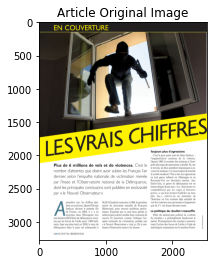

In [5]:
start = time.time()

image = cv2.imread('/Users/harshit/Desktop/Major_Project/DataSet/article/article_image_2.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('Article Original Image')
plt.show()

In [6]:
# import PIL
# from PIL import ImageDraw
# img = PIL.Image.open("3.png")
# img


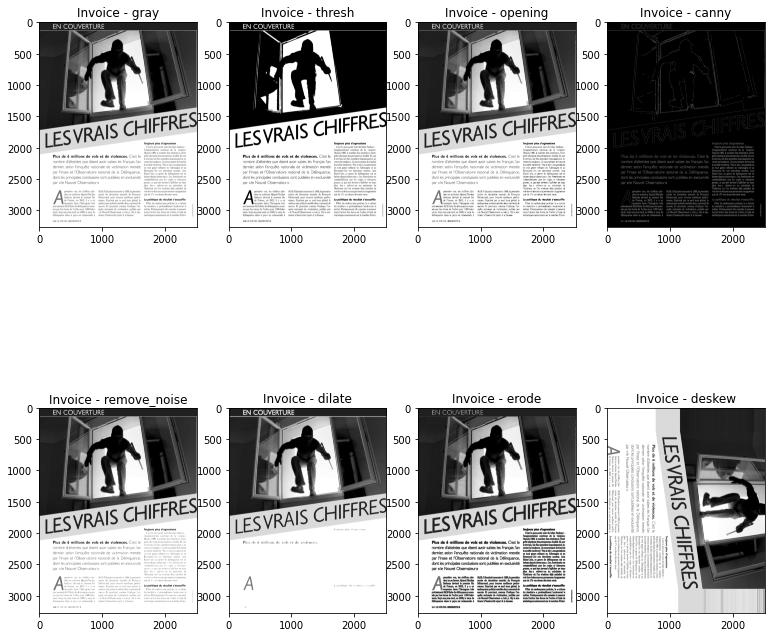

In [7]:
# Preprocess and Plot images after preprocessing

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
remove_noise = remove_noise(gray)
dilate = dilate(gray)
erode = erode(gray)
deskew = deskew(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny,
         'remove_noise': remove_noise,
         'dilate': dilate,
          'erode': erode,
          'deskew': deskew
         }

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 4
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('Invoice - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [8]:




# custom_config = r'--oem 4 --psm 6'
print('-----------------------------------------')
print('EasyOCR OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
org_image = reader.readtext(gray)

org_image_text = ""

for _, text, __ in org_image: # _ = bounding box, text = text and __ = confident level
    org_image_text += " "
    org_image_text += text

print(org_image_text)


print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
thresh_image = reader.readtext(thresh)

thresh_image_text = ""

for _, text, __ in thresh_image: # _ = bounding box, text = text and __ = confident level
    thresh_image_text += " "
    thresh_image_text += text

print(thresh_image_text)

print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
opened_image = reader.readtext(opening)

opened_image_text = ""

for _, text, __ in opened_image: # _ = bounding box, text = text and __ = confident level
    opened_image_text += " "
    opened_image_text += text

print(opened_image_text)

print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
canny_edge_image = reader.readtext(canny)

canny_image_text = ""

for _, text, __ in canny_edge_image: # _ = bounding box, text = text and __ = confident level
    canny_image_text += " "
    canny_image_text += text

print(canny_image_text)


print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> NOISE REMOVED IMAGE')
print('-----------------------------------------')
noise_removed_image = reader.readtext(remove_noise)

noise_removed_image_text = ""

for _, text, __ in noise_removed_image: # _ = bounding box, text = text and __ = confident level
    noise_removed_image_text += " "
    noise_removed_image_text += text

print(noise_removed_image_text)


print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> DILATE IMAGE')
print('-----------------------------------------')
dilate_image = reader.readtext(dilate)

dilate_image_text = ""

for _, text, __ in dilate_image: # _ = bounding box, text = text and __ = confident level
    dilate_image_text += " "
    dilate_image_text += text

print(dilate_image_text)

print('\n-----------------------------------------')
print('EasyOCR OUTPUT --> ERODE IMAGE')
print('-----------------------------------------')
erode_image =reader.readtext(erode)

erode_image_text = ""

for _, text, __ in erode_image: # _ = bounding box, text = text and __ = confident level
    erode_image_text += " "
    erode_image_text += text

print(erode_image_text)

end = time.time()


-----------------------------------------
EasyOCR OUTPUT --> ORIGINAL IMAGE
-----------------------------------------


/Users/harshit/opt/anaconda3/envs/EasyOCR/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 EN COUVERTURE Toujours plus d'agressions Cest le gros noir du bilan Sarkozy laugmentation continue de   la violence. Depuis 1996, le nombre des atteintes à Yinté- Plus de 6 millions de vols et de violences. Cest le grité physique des personnes a doublé. Et; sur le terrain; les flics semblent impuissants à in- nombre datteintes que disent avoir subies les Français l'an verser la tendance. Un mouvement de fond de la société moderne ? Pas si sûr. Les agressions dernier; selon Ienquête nationale de victimation menée en tout genre refluent en Allemagne et au Royaume-Uni  ces dernières   années: Aux par IInsee et lObservatoire national de la Délinquance; Etats-Unis; ce genre de délinquance est en dont les principales conclusions sont publiées en exclusivité baisse depuis douze ans: Les Américains ne comptabilisent que les coups et blessures par < le Nouvel Observateur> graves; ce leur permet &afficher un taux plus bas >, relève-t-on au ministère de PIntérieur où Yon sestime déjà satisfait d

 EN COUVERTURE Toujours plus d'agressions Cest le groc point noir du bilaan Sarkozs Taugmentation   continue de Ja Fiolence. Ikpuis 199;, le nombre des atteintes à Vinte Plus de 6 millions de vols et de violences. C'est le phssique des personnesa double. Ft ~ur leterrain; les flics semblent impuissntsa in: nombre datteintes que disent avoir subies les Français /an Verxr la tendance. Un mnouvetlent de fond de la ~xicte mnoderne ? Passi cûr. [xsagrensions dernier; selon I'enquête nationale de victimation menée en toUt genre refluent en Allemagne et au Royaune-U ni ces dernieres annces Iux par I'Insee et /Observatoire national de la Délinquance; Etats-Unis ( genre de delinquance et cn dont les principales conclusions sont publiées en exclusivité Ixisse depuis douzeans Ics Amcricains ne comptabilisent   qus les coups ct blssur"s par < le Nouvel Observateur > gravrs €€ lcur permet dattichr un taux plus bas Tcleve-( -on au mninistere de [Interieur ou fon ~estime deja satistait de premicre vu

In [9]:
# import PIL
# from PIL import ImageDraw

In [12]:
with open("/Users/harshit/Desktop/Major_Project/DataSet/article/article_image_2.txt", 'r') as text:
    output_text = text.read()
    print(output_text)

EN COUVERTURE

Plus de 6 millions de vols et de violences. C'est le
nombre d'atteintes que disent avoir subies les Français l'an
dernier, selon l'enquête nationale de victimation menée
par l'lnsee et l'Observatoire national de la Délinquance,
dont les principales conclusions sont publiées en exclusivité
par « le Nouvel Observateur»

A première vue, les chiffres plai-
dent en sa faveur. Quand Nicolas
Sarkozy devient le premier flic
de France, en 2002, il y a en
moyenne dans l'Hexagone très
précisément 69,32 faits de délinquance recen-
sés par les forces de l'ordre pour 1 000 habi-
tants. Sept ans plus tard, en 2009, le taux de
délinquance dans le pays est redescendu à

14 0 LE NOUVEL OBSERVATEUR

56,39. Il faudrait remonter à 1988, la première
année du deuxième mandat de François
Mitterrand, pour trouver meilleure perfor-
mance. Exprimé par ce seul taux global, le
sarkozysme policier semble donc couronné de
succès. Et pourtant, comme l'indique l'en-
quête nationale de victimation, publi

In [13]:
# pip install langdetect

In [14]:
from langdetect import detect_langs
detect_langs(output_text)

[fr:0.9999980980410321]

In [15]:
print(end - start)
image_type = [org_image_text, thresh_image_text, opened_image_text, canny_image_text, noise_removed_image_text, dilate_image_text, erode_image_text]
for i in image_type:
    score_char_level = fastwer.score_sent(i, output_text, char_level=True)
    rounded_score = round(score_char_level, ndigits=2)
    print(rounded_score,'%')
   

394.74590373039246
78.54 %
78.41 %
77.64 %
78.36 %
77.82 %
94.57 %
76.73 %


In [16]:
image_type = [org_image_text, thresh_image_text, opened_image_text, canny_image_text, noise_removed_image_text, dilate_image_text, erode_image_text]
for i in image_type:
    score_char_level = fastwer.score_sent(i, output_text, char_level=False)
    rounded_score = round(score_char_level, ndigits=2)
    print(rounded_score,'%')

112.71 %
111.0 %
110.31 %
115.12 %
111.34 %
97.94 %
97.25 %
